In [2]:
# Import library
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt


In [3]:
# loading data into dataframe through csv file
df=pd.read_csv(r"D:\downloads\telecom.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Analysing data (like null values, dtype, dimensions etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# converting the dataType of "TotalCharges" column from String to float 
df['TotalCharges'] = df['TotalCharges'].str.replace(' ', '0').astype(float)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
cat_var = df[['gender','PhoneService','PaperlessBilling','Churn']]

In [9]:
# encoding of catagorical data
label_encoder = LabelEncoder()
for col in cat_var.columns:
    df[col] = label_encoder.fit_transform(df[col])


In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,Yes,No,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,No,No,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,No,No,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,No,No,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,No,No,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [11]:
df.corr()

C:\Users\dines\AppData\Local\Temp\ipykernel_16244\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,gender,SeniorCitizen,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,0.005106,-0.006488,-0.011754,-0.014569,-0.000080,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016567,0.008576,0.156530,0.220173,0.103006,0.150889
tenure,0.005106,0.016567,1.000000,0.008448,0.006152,0.247900,0.826178,-0.352229
PhoneService,-0.006488,0.008576,0.008448,1.000000,0.016505,0.247398,0.113214,0.011942
PaperlessBilling,-0.011754,0.156530,0.006152,0.016505,1.000000,0.352150,0.158574,0.191825
MonthlyCharges,-0.014569,0.220173,0.247900,0.247398,0.352150,1.000000,0.651174,0.193356
TotalCharges,-0.000080,0.103006,0.826178,0.113214,0.158574,0.651174,1.000000,-0.198324
Churn,-0.008612,0.150889,-0.352229,0.011942,0.191825,0.193356,-0.198324,1.000000


As we can see MonthlyCharges are high correlated with Tenure and Total Charges 
and Churn is weak correlated with Tenure
So we can drop remaining columns 

In [12]:
df=df[['tenure','MonthlyCharges','TotalCharges','Churn']]

splitting data set into two data sets (for churn prediction)

In [13]:
X1_train, X1_test, y1_train, y1_test = train_test_split(df[['tenure']],df['Churn'],test_size=0.3,random_state=12)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model1 = LogisticRegression()
is_churn = model1.fit(X1_train,y1_train)

evaluation of churn model

In [16]:
y1_pred = is_churn.predict(X1_test)
r2 = r2_score(y1_test, y1_pred)
print("R-squared for TotalCharges:", r2)

R-squared for TotalCharges: -0.3490682716705018


In [17]:
p = pd.DataFrame()

In [18]:
p['tenure']=X1_test
p['churn']=y1_test
p['pred']=y1_pred
p

,tenure,churn,pred
6235,22,1,0
3980,28,1,0
6548,31,0,0
3954,17,0,0
5328,55,0,0
...,...,...,...
1787,42,0,0
3167,64,0,0
483,72,0,0
4889,47,0,0


evaluating model score

In [19]:
model1.score(X1_test,y1_test)

0.7439659252247989

In [20]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [21]:
conf = confusion_matrix(y1_test, y1_pred)
conf

array([[1572,    3],
       [ 538,    0]], dtype=int64)

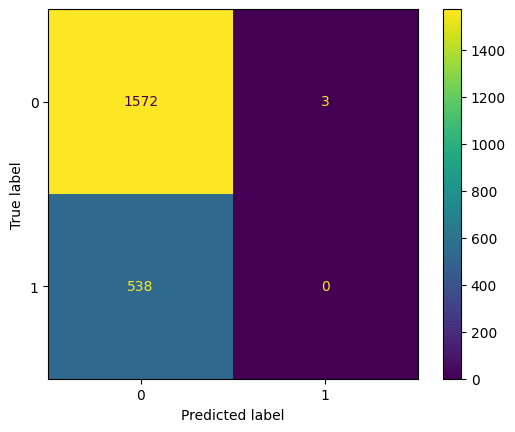

In [22]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf)
disp.plot()
plt.show()

splitting data set into two data sets (for Total charges prediction)

In [23]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df[['MonthlyCharges','tenure']],df['TotalCharges'], test_size=0.3, random_state=22)

In [24]:
model2 = LinearRegression()
Total_charge = model2.fit(X2_train,y2_train)

evaluation of total charges model

In [25]:
y2_pred = Total_charge.predict(X2_test)
mse = mean_squared_error(y2_test, y2_pred)
print("MSE for Churn:", mse)

MSE for Churn: 557615.0132079041
